# MODELOS DE MACHINE LEARNING - REGRESIONES

## Librerías

In [379]:
#!pip install statsmodels

In [1]:
# Import necessary libs

import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## Modelos de regresion
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm           
import statsmodels.formula.api as smf  

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas de evaluación
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

#separar train and test
from sklearn.model_selection import train_test_split

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis

In [2]:
# Columnas a mostrar
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

## Datos del Negocio

In [5]:
dataset = pd.read_csv('demanda_data.csv',sep=';',parse_dates = ['tiempo'])
dataset

,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
0,01/01/2005,45.08,19.9,1,B,1,0.585294,0.000000,0.000000,0,0,2032
1,02/01/2005,24.56,69.9,1,A,1,0.499286,0.000000,0.000000,0,0,603
2,03/01/2005,104.01,41.9,1,D,1,0.487209,0.000000,0.000000,0,0,10819
3,04/01/2005,59.23,33.9,1,B,1,0.498529,0.000000,0.000000,0,0,3508
4,05/01/2005,24.74,85.0,1,A,1,0.500000,0.000000,0.000000,0,0,612
...,...,...,...,...,...,...,...,...,...,...,...,...
3842,19/07/2015,14.93,22.9,1,B,1,0.497826,0.000000,0.000000,0,0,1765
3843,20/07/2015,31.43,49.9,1,A,1,0.631646,0.000000,0.000000,0,0,352
3844,21/07/2015,58.06,22.9,1,B,1,0.636111,0.000000,0.000000,0,0,1203
3845,22/07/2015,31.84,41.9,1,A,1,0.644615,0.000000,0.000000,0,0,222


## Análisis Exploratorio de los Datos (EDA)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tiempo                    3847 non-null   object 
 1   Costo                     3847 non-null   float64
 2   PrecioOfertaProm          3847 non-null   float64
 3   NroTipoOfertas            3847 non-null   int64  
 4   Marca                     3847 non-null   object 
 5   CantOfertas               3847 non-null   int64  
 6   MaxDescuento%             3847 non-null   float64
 7   minDescuento%             3847 non-null   float64
 8   FactordeDescuentos        3847 non-null   float64
 9   FlagCampana               3847 non-null   int64  
 10  TieneUbicacionEspecifica  3847 non-null   int64  
 11  UnidadesDemandas          3847 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 360.8+ KB


In [384]:
dataset.isnull().sum()

tiempo                      0
Costo                       0
PrecioOfertaProm            0
NroTipoOfertas              0
Marca                       0
CantOfertas                 0
MaxDescuento%               0
minDescuento%               0
FactordeDescuentos          0
FlagCampana                 0
TieneUbicacionEspecifica    0
UnidadesDemandas            0
dtype: int64

In [385]:
dataset.shape

(3847, 12)

In [386]:
len(dataset.tiempo.unique()) #Nos indica que tenemos el dataset de los productos vendidos de forma diaria

3847

In [23]:
dataset['Marca'].unique()

array(['B', 'A', 'D', 'C'], dtype=object)

## Gráfico para el target

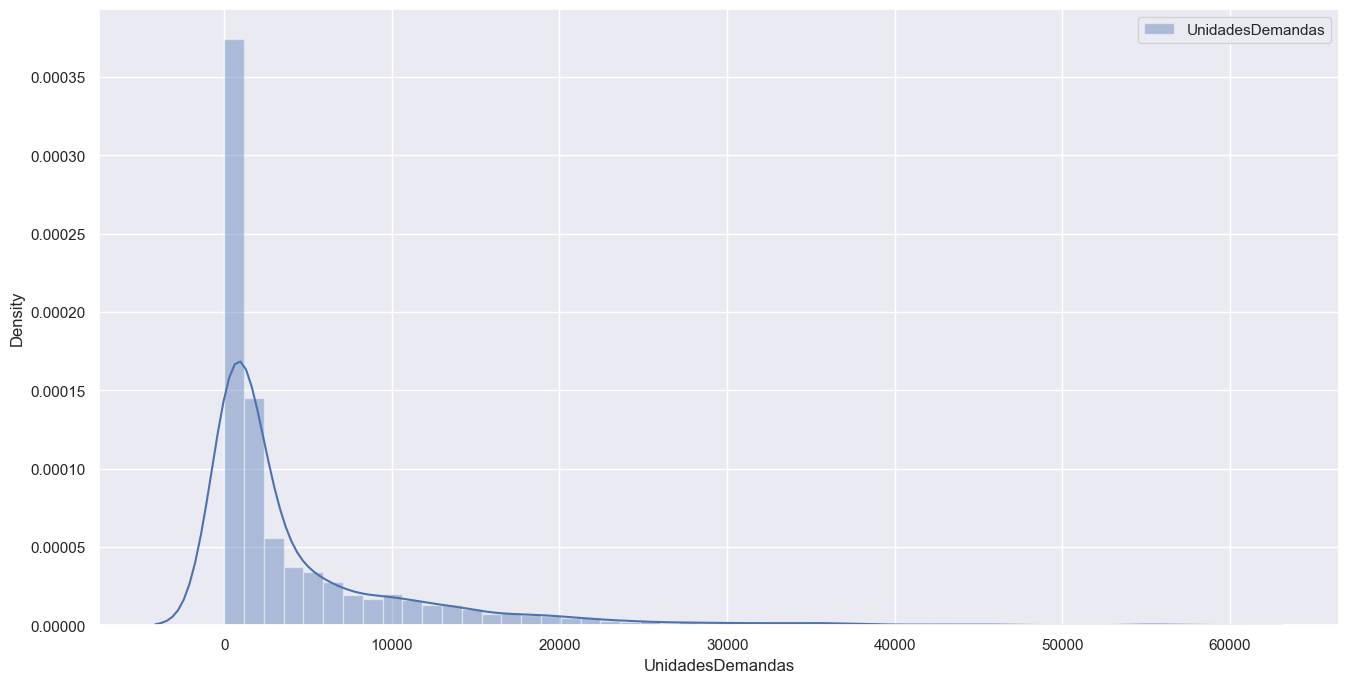

In [387]:
# Grouped boxplot
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(dataset["UnidadesDemandas"] , label="UnidadesDemandas")
plt.legend()
plt.show()

## Suavizamos el target 

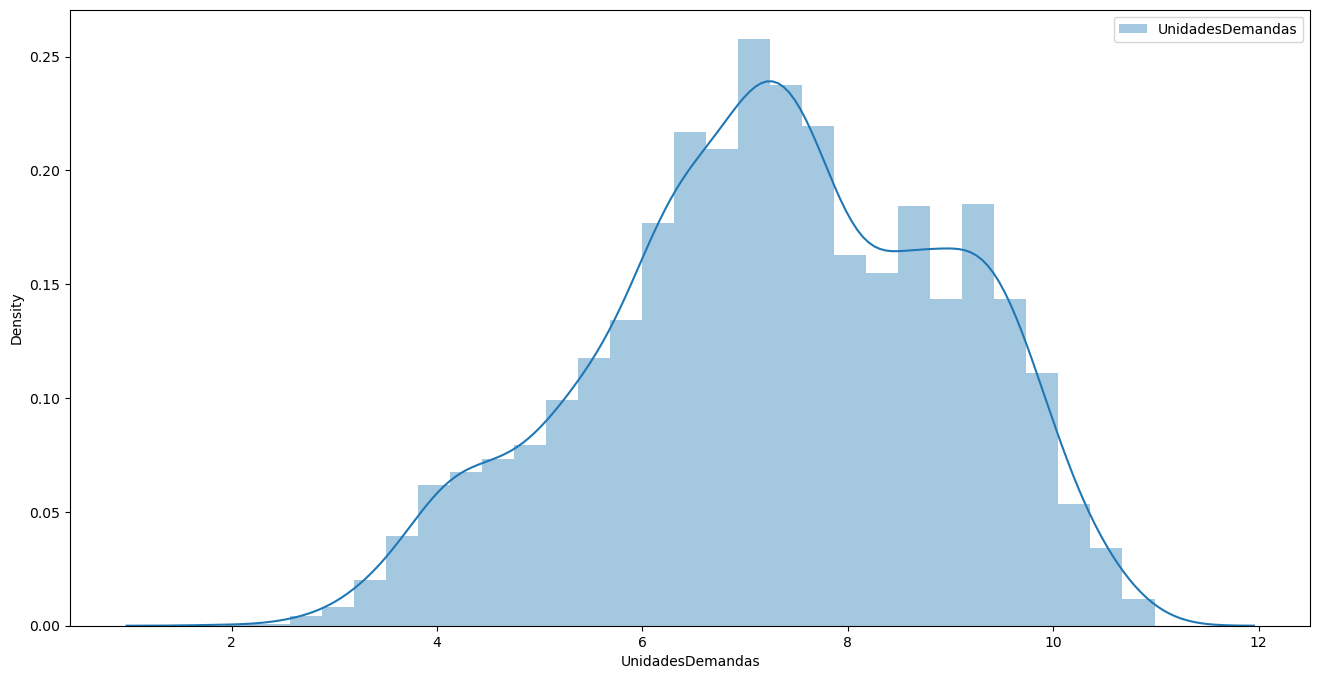

In [24]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(np.log(dataset["UnidadesDemandas"]) , label="UnidadesDemandas")
plt.legend()
plt.show()

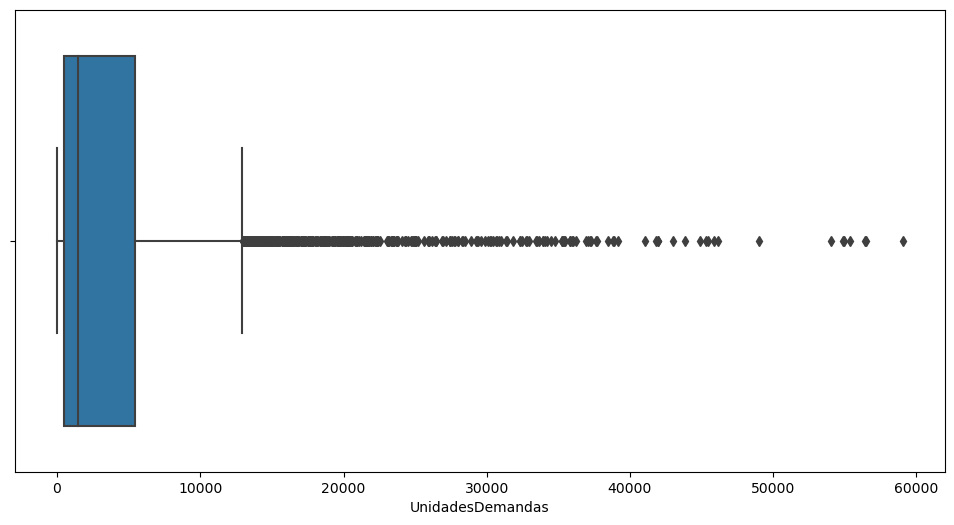

In [25]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='UnidadesDemandas', data=dataset);

## Analisis descriptivo cuantitativo

In [26]:
#target
target = ['UnidadesDemandas']  

# data continua comercial
var_1 = ["PrecioOfertaProm", "Costo","MaxDescuento%","minDescuento%"] #

In [27]:
dataset[var_1].describe()

,PrecioOfertaProm,Costo,MaxDescuento%,minDescuento%
count,3847.000000,3847.000000,3847.000000,3847.000000
mean,51.156202,46.805753,0.600289,0.076029
std,30.549777,35.658520,0.079967,0.150116
min,8.000000,2.600000,0.311250,0.000000
25%,29.900000,22.430000,0.540000,0.000000
50%,39.900000,34.940000,0.615753,0.000000
75%,72.900000,62.765000,0.656722,0.000000
max,149.000000,237.400000,0.810135,0.472632


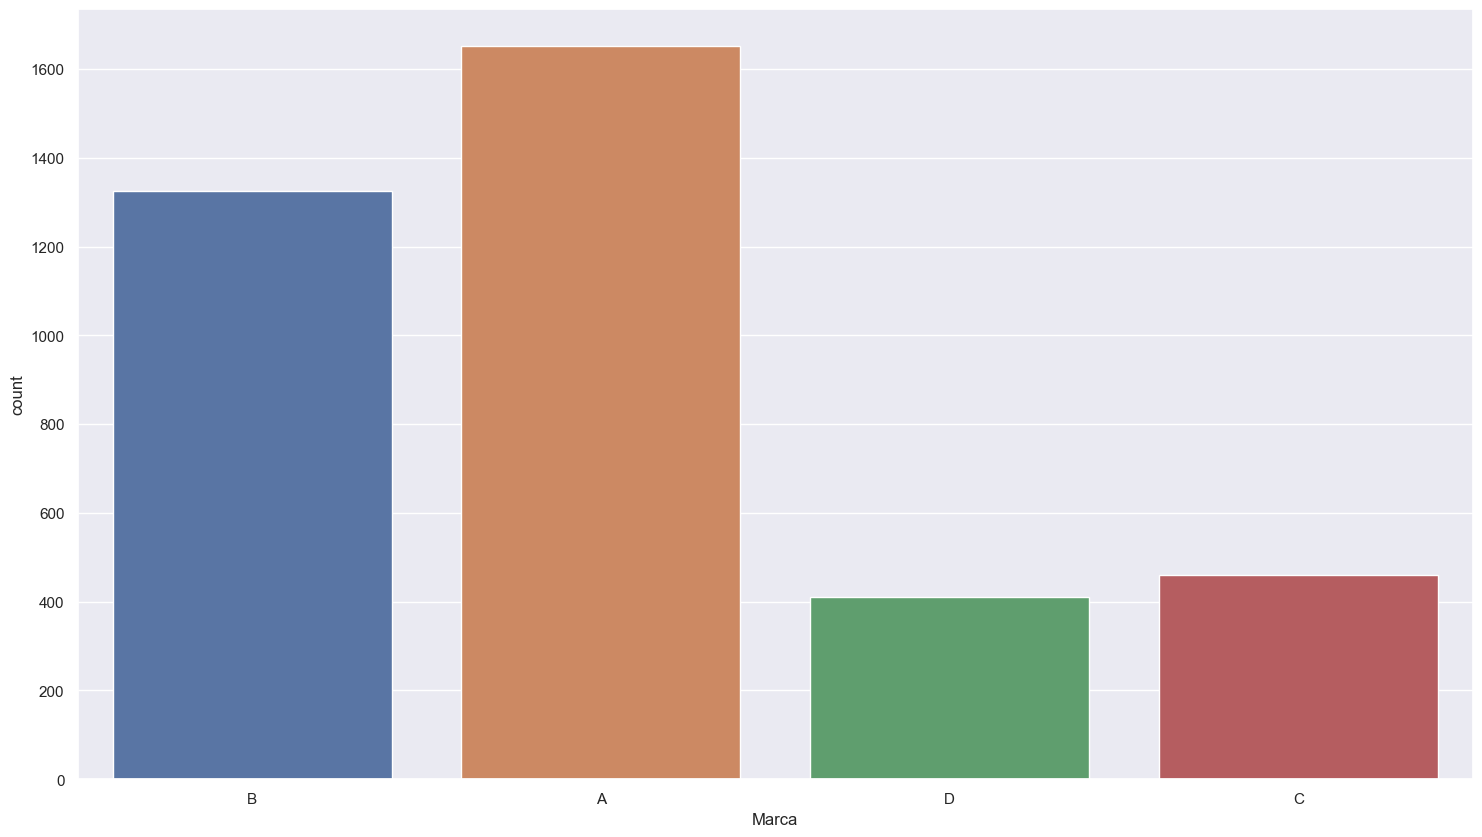

In [28]:
sns.set()
plt.figure(figsize=(18,10))
sns.countplot(x='Marca', data=dataset)
plt.show();

In [29]:
dataset['Marca'].value_counts() 

Marca
A    1652
B    1325
C     459
D     411
Name: count, dtype: int64

In [30]:
dataset['Marca'].value_counts(normalize=True) 

Marca
A    0.429426
B    0.344424
C    0.119314
D    0.106836
Name: proportion, dtype: float64

## Gráfico de Dispersión

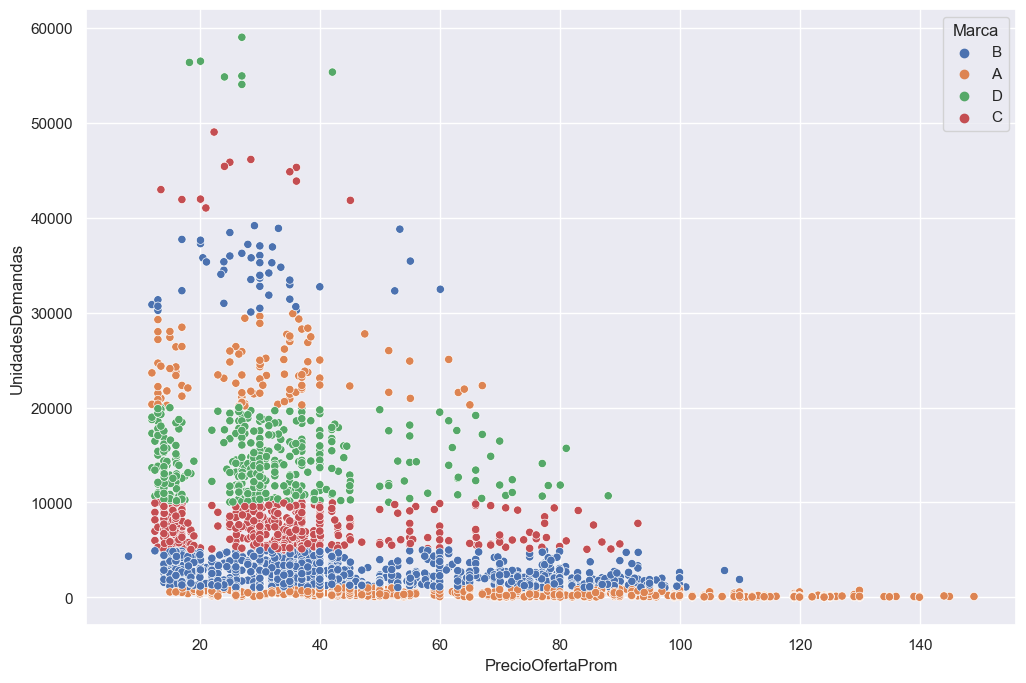

In [31]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='PrecioOfertaProm',
                y='UnidadesDemandas',
                data=dataset,
                hue='Marca')
plt.show()



<Figure size 1200x800 with 0 Axes>

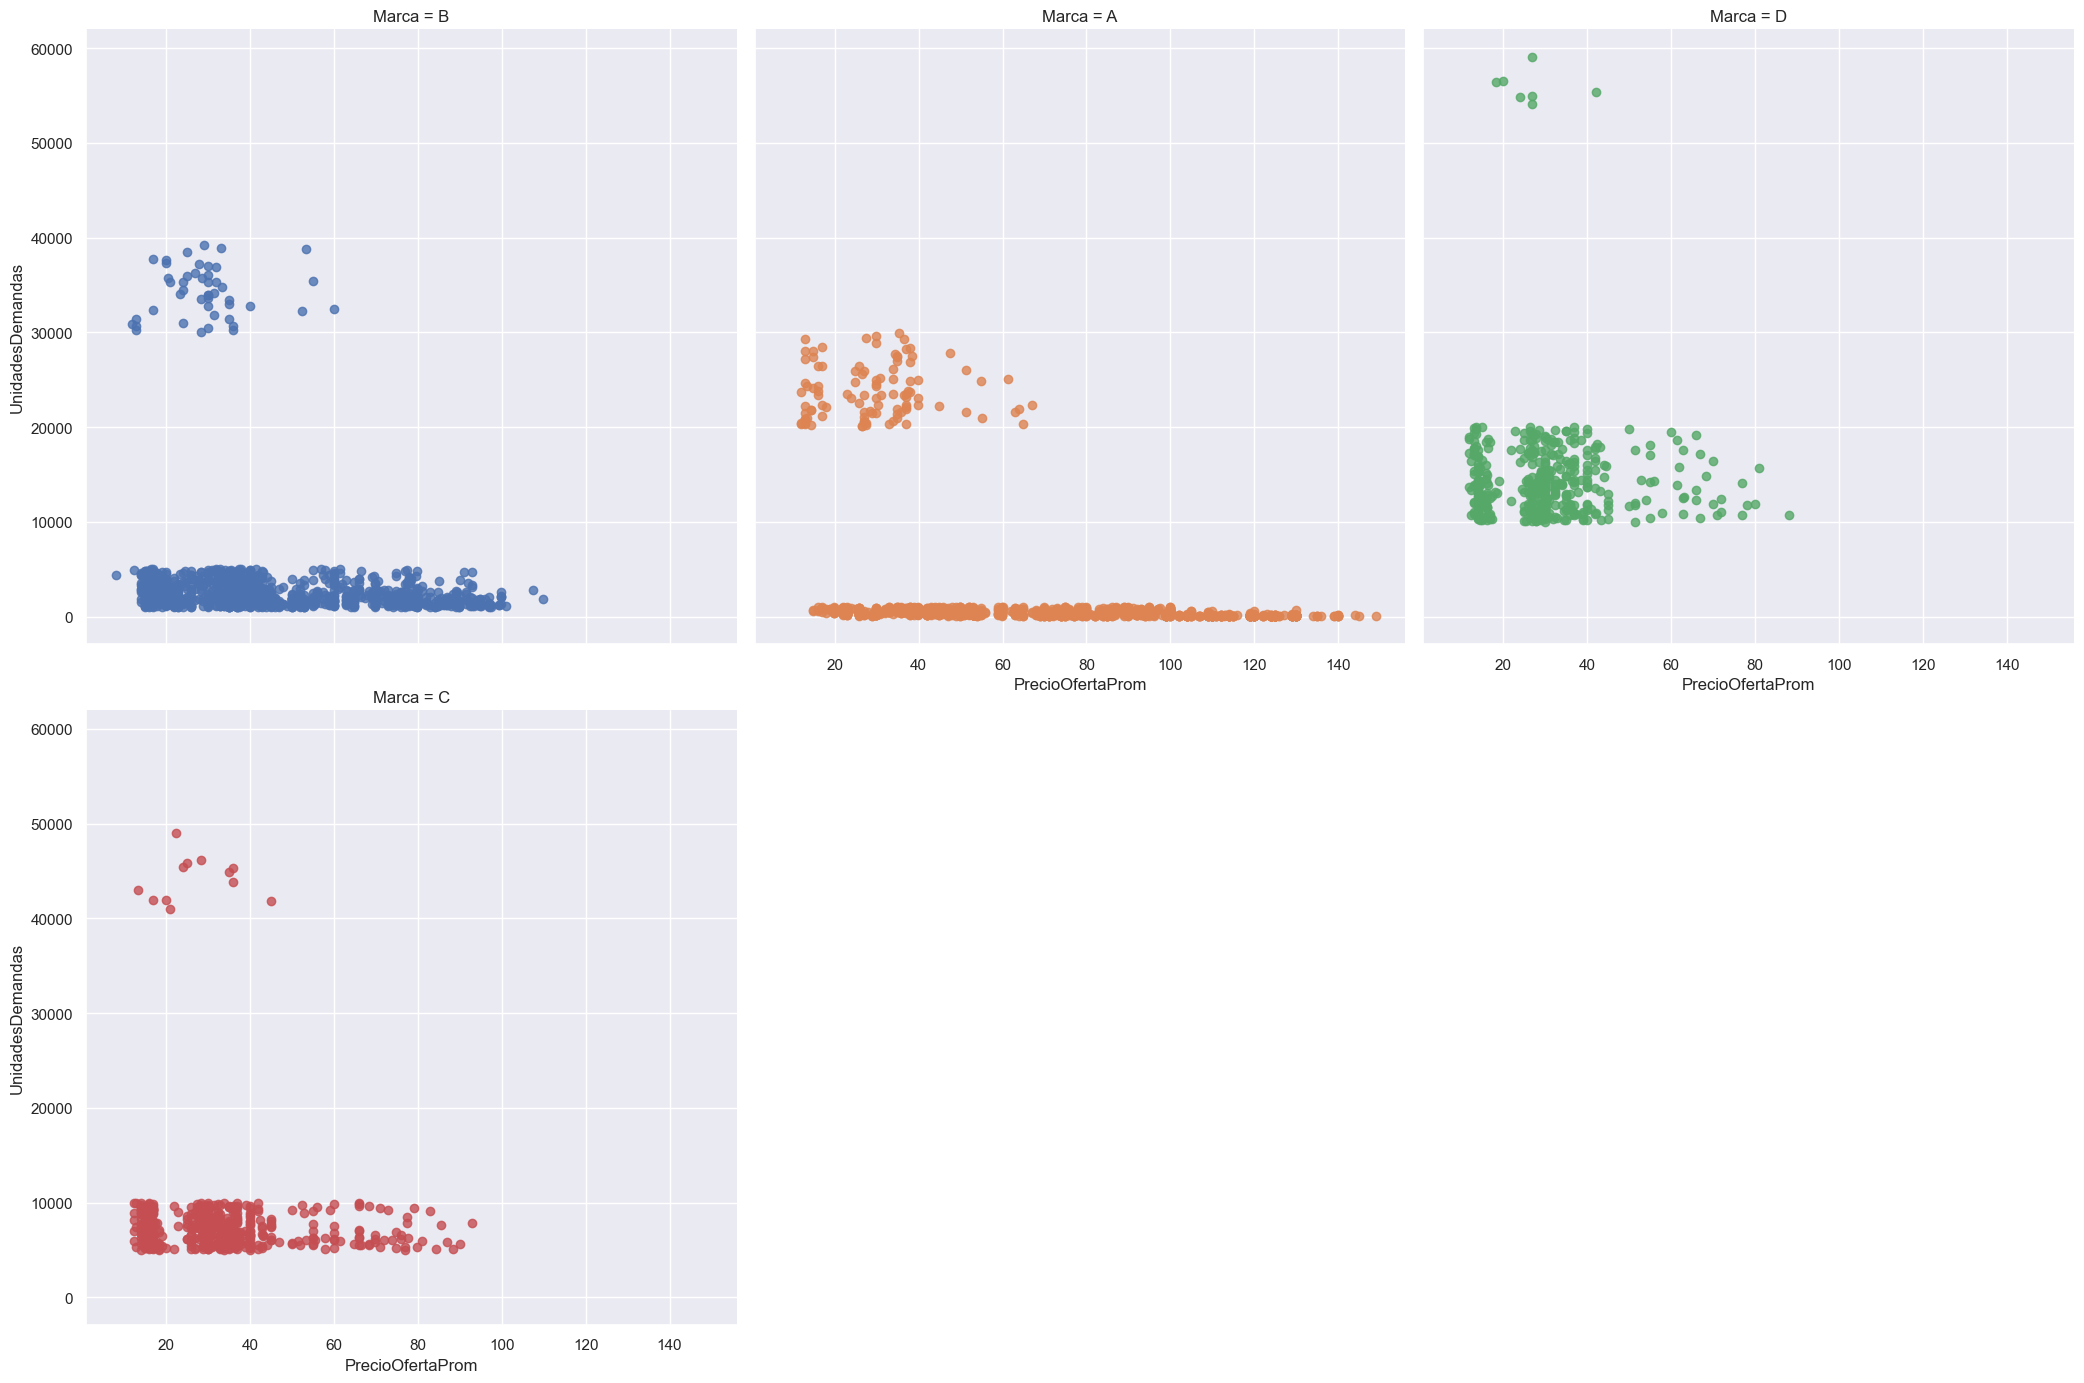

In [32]:
## Por separado

plt.figure(figsize=(12,8))
sns.lmplot(x='PrecioOfertaProm', y='UnidadesDemandas', data=dataset,
           # eje x se utilizará la columna PrecioOfertaProm ,# eje y se utilizará la columna UnidadesDemandas
           fit_reg=False, # Trazar una línea de regresión en el gráfico
           col='Marca',  # Columnas para cada marca
           hue='Marca',  # Colores según la marca
           col_wrap=3,  # Número de columnas en cada fila
           height=7  # Altura de cada gráfico
          )   
plt.show()

## Evolución temporal de target

In [34]:
dataset['UnidadesDemandas'].head(10)

0     2032
1      603
2    10819
3     3508
4      612
5      513
6     3264
7    24900
8      132
9     7042
Name: UnidadesDemandas, dtype: int64

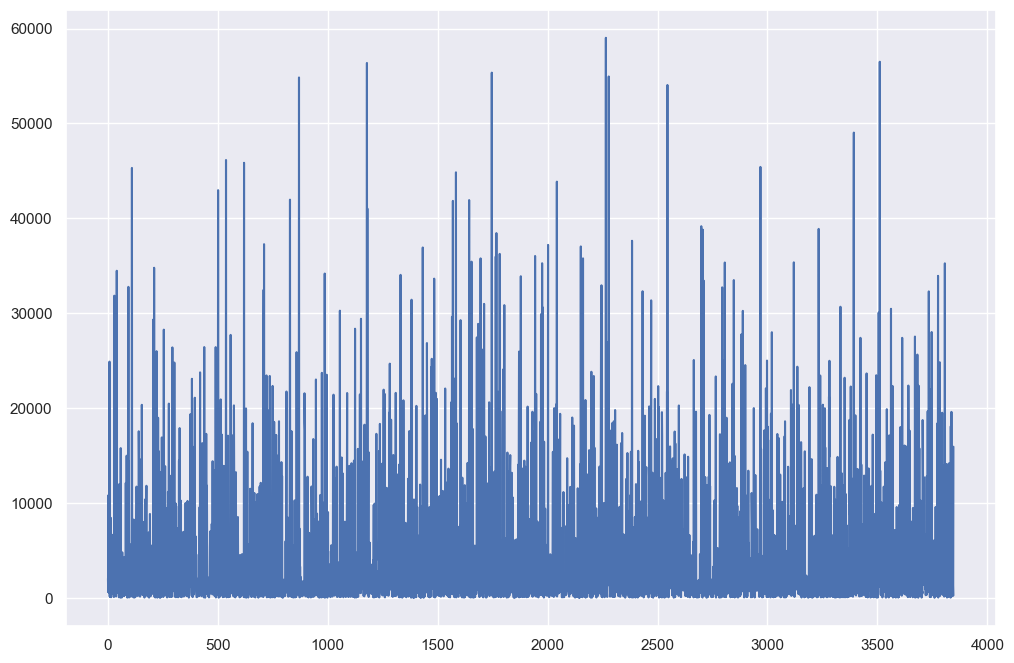

In [35]:
sns.set() 
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible
plt.plot(dataset['UnidadesDemandas'])  # gráfico de línea.
plt.show();

In [36]:
dataset['UnidadesDemandas'].head(10)

0     2032
1      603
2    10819
3     3508
4      612
5      513
6     3264
7    24900
8      132
9     7042
Name: UnidadesDemandas, dtype: int64

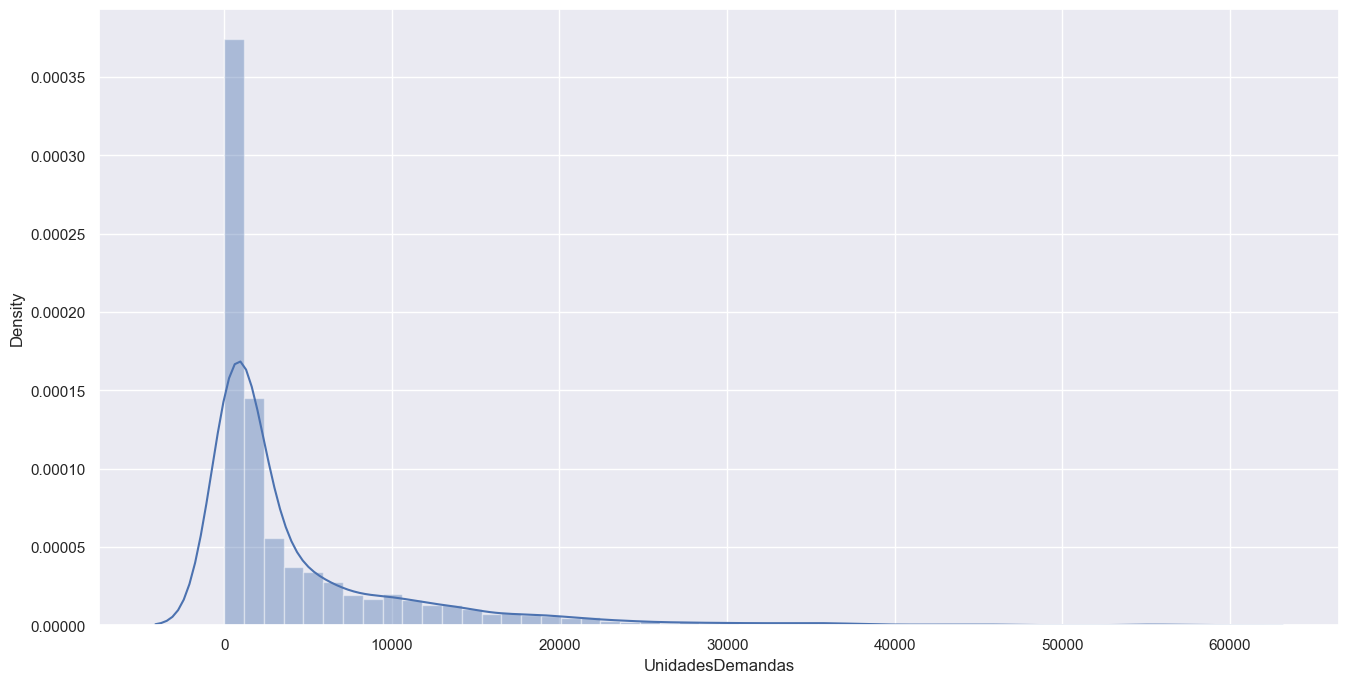

In [37]:
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(dataset['UnidadesDemandas'])
plt.show()


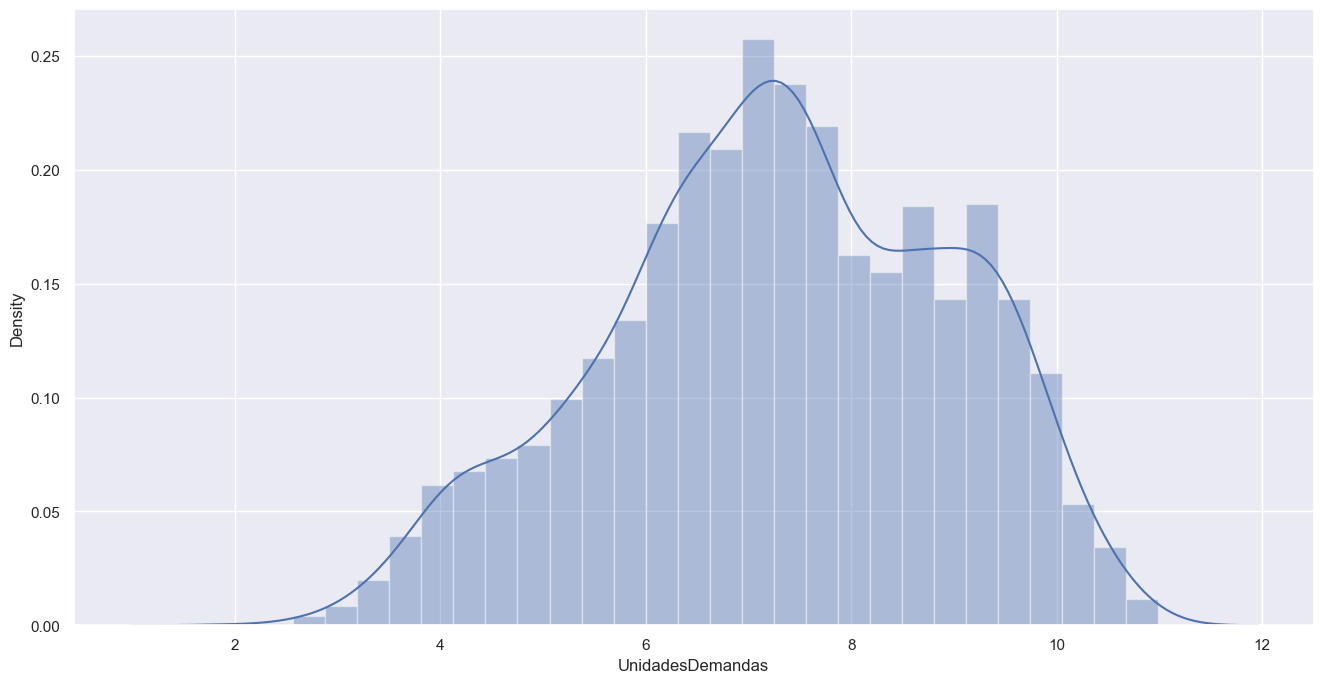

In [38]:
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(np.log(dataset['UnidadesDemandas']))
plt.show()

In [39]:
np.log(dataset['UnidadesDemandas']).head(10) #logaritmo natural 

0     7.616776
1     6.401917
2     9.289059
3     8.162801
4     6.416732
5     6.240276
6     8.090709
7    10.122623
8     4.882802
9     8.859647
Name: UnidadesDemandas, dtype: float64

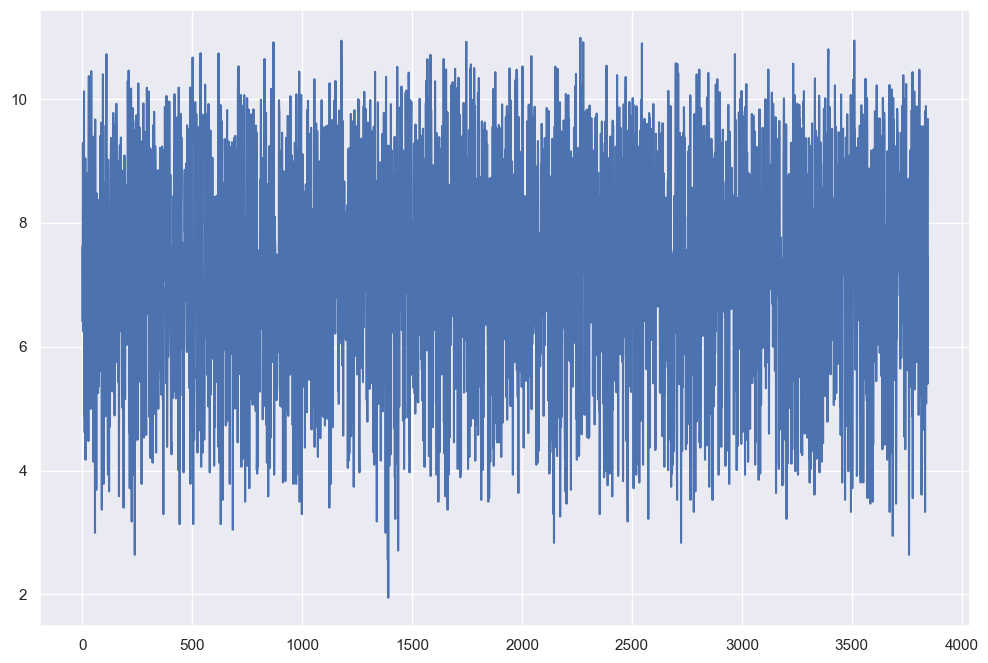

In [40]:
sns.set() 
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible
plt.plot(np.log(dataset['UnidadesDemandas']))
plt.show();

# Dispersión de algunas variables Cuantitativas

<Figure size 800x400 with 0 Axes>

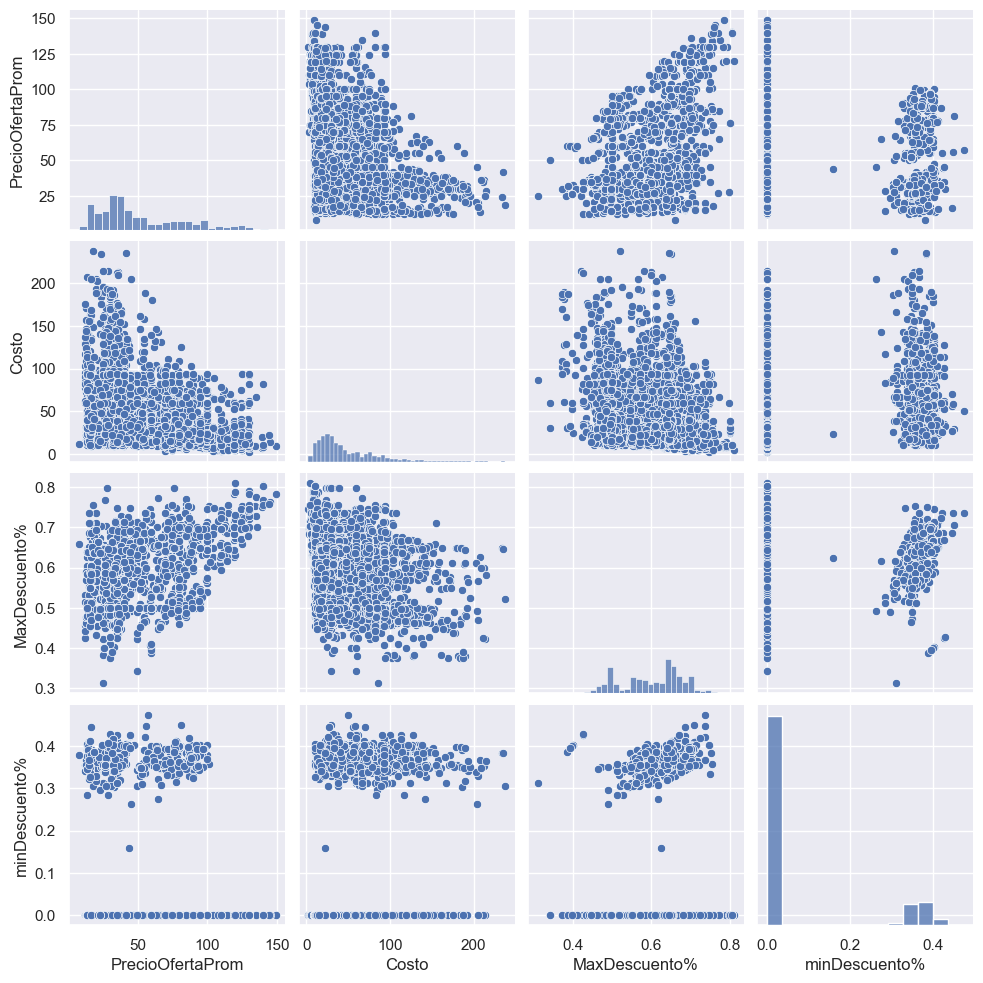

In [41]:
sns.set()
plt.figure(figsize=(8,4))
sns.pairplot(dataset[var_1]); #matriz de gráficos de dispersión (scatter plots)
plt.show()

## Correlaciones de Pearson

In [42]:
dataset[var_1].corr(method= 'pearson')

,PrecioOfertaProm,Costo,MaxDescuento%,minDescuento%
PrecioOfertaProm,1.000000,-0.339035,0.437895,-0.096167
Costo,-0.339035,1.000000,-0.289330,0.300746
MaxDescuento%,0.437895,-0.289330,1.000000,0.131808
minDescuento%,-0.096167,0.300746,0.131808,1.000000


(4.0, 0.0)

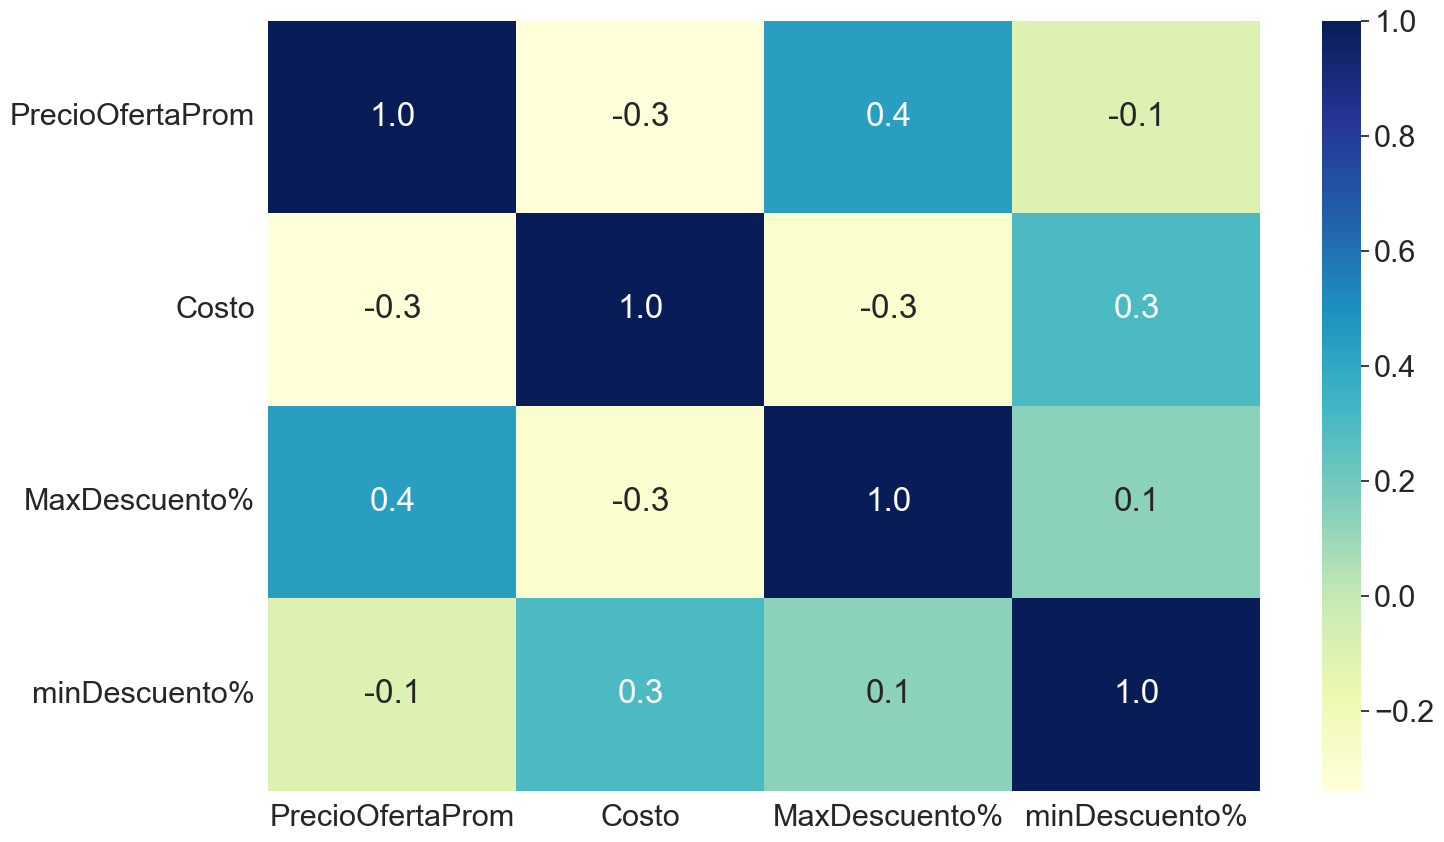

In [43]:
sns.set(font_scale=2) #Establece la escala de fuente de Seaborn a 2.
corr_matrix = dataset[var_1].corr()#Calcula la matriz de correlación para la variable var_1
plt.figure(figsize=(16, 10)) # Crea una nueva figura de Matplotlib con un tamaño de 16 pulgadas de ancho y 10 pulgadas de alto. 

ax = sns.heatmap(corr_matrix,
                 annot=True,#Crea un mapa de calor,annot="muestra los valores de la correla"
                 fmt=".1f",#.1f significa que se mostrará un solo decimal 
                 cmap="YlGnBu") #paleta de colores es "YlGnBu"
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

In [44]:
dataset.head()

,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
0,01/01/2005,45.08,19.9,1,B,1,0.585294,0.0,0.0,0,0,2032
1,02/01/2005,24.56,69.9,1,A,1,0.499286,0.0,0.0,0,0,603
2,03/01/2005,104.01,41.9,1,D,1,0.487209,0.0,0.0,0,0,10819
3,04/01/2005,59.23,33.9,1,B,1,0.498529,0.0,0.0,0,0,3508
4,05/01/2005,24.74,85.0,1,A,1,0.500000,0.0,0.0,0,0,612


## Preprocesing de la data

In [45]:
# Selección de variables categóricas
target = 'UnidadesDemandas'
exclude = ['tiempo']

# Obtener columnas que no son 'tiempo' ni la variable objetivo 'UnidadesDemandas'
cols = [x for x in dataset.columns 
        if x not in exclude + [target]]

# Filtrar columnas que son de tipo 'object' (categóricas)
cols_cat = dataset[cols].select_dtypes(['object']).columns.tolist()

# Obtener índices y nombres de las columnas categóricas
index_categorical = [cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical, cols_cat)

# Para entrenamiento

for i in cols_cat:
    # Inicializar y ajustar un LabelEncoder para cada columna categórica
    le = preprocessing.LabelEncoder()
    le.fit(list(dataset[i].dropna()))

    # Transformar los valores no nulos en la columna con el LabelEncoder ajustado
    dataset.loc[~dataset[i].isnull(), i] = le.transform(dataset[i].dropna())

# Mostrar las primeras filas del conjunto de datos modificado
dataset[cols].head()

['tiempo'] 

 [3] ['Marca']


,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica
0,45.08,19.9,1,1,1,0.585294,0.0,0.0,0,0
1,24.56,69.9,1,0,1,0.499286,0.0,0.0,0,0
2,104.01,41.9,1,3,1,0.487209,0.0,0.0,0,0
3,59.23,33.9,1,1,1,0.498529,0.0,0.0,0,0
4,24.74,85.0,1,0,1,0.500000,0.0,0.0,0,0


In [47]:
dataset['Marca'].unique()

array([1, 0, 3, 2], dtype=object)

In [48]:
# Convertir la columna 'Marca' a tipo int64
dataset['Marca'] = dataset['Marca'].astype('int64')

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tiempo                    3847 non-null   object 
 1   Costo                     3847 non-null   float64
 2   PrecioOfertaProm          3847 non-null   float64
 3   NroTipoOfertas            3847 non-null   int64  
 4   Marca                     3847 non-null   int64  
 5   CantOfertas               3847 non-null   int64  
 6   MaxDescuento%             3847 non-null   float64
 7   minDescuento%             3847 non-null   float64
 8   FactordeDescuentos        3847 non-null   float64
 9   FlagCampana               3847 non-null   int64  
 10  TieneUbicacionEspecifica  3847 non-null   int64  
 11  UnidadesDemandas          3847 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 360.8+ KB


In [50]:
dataset['Marca'].unique()

array([1, 0, 3, 2], dtype=int64)

In [493]:
# Selección de variables categóricas
target = 'UnidadesDemandas'
exclude = ['tiempo']

# Obtener columnas que no son 'tiempo' ni la variable objetivo 'UnidadesDemandas'
cols = [x for x in dataset.columns 
        if x not in exclude + [target]]

In [412]:
dataset.columns

Index(['tiempo', 'Costo', 'PrecioOfertaProm', 'NroTipoOfertas', 'Marca',
       'CantOfertas', 'MaxDescuento%', 'minDescuento%', 'FactordeDescuentos',
       'FlagCampana', 'TieneUbicacionEspecifica', 'UnidadesDemandas'],
      dtype='object')

In [413]:
exclude

['tiempo']

In [414]:
cols

['Costo',
 'PrecioOfertaProm',
 'NroTipoOfertas',
 'Marca',
 'CantOfertas',
 'MaxDescuento%',
 'minDescuento%',
 'FactordeDescuentos',
 'FlagCampana',
 'TieneUbicacionEspecifica']

In [415]:
dataset.tiempo.min()

'01/01/2005'

In [416]:
dataset.tiempo.max()

'31/12/2014'

In [417]:
dataset.shape[0]

3847

## Modelos de Regresión

### Selección de muestras de entrenamiento y validación 

In [418]:
X_train = dataset[dataset.tiempo < '2015-06-01'].drop(['UnidadesDemandas',
                                                       'tiempo',
                                                       'CantOfertas',
                                                       'TieneUbicacionEspecifica'],
                                                      axis=1)


X_test = dataset[dataset.tiempo >= '2015-06-01'].drop(['UnidadesDemandas',
                                                       'tiempo','CantOfertas',
                                                       'TieneUbicacionEspecifica'],
                                                      axis=1)


y_train = dataset[dataset.tiempo < '2015-06-01'][['UnidadesDemandas']]
y_test= dataset[dataset.tiempo >= '2015-06-01'][['UnidadesDemandas']]

### Segundo método con split aleatorio

In [419]:
X = dataset.drop(['UnidadesDemandas',
                  'tiempo',
                  'CantOfertas',
                  'TieneUbicacionEspecifica'], axis=1)

y = dataset[['UnidadesDemandas']]

In [420]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # split del conjunto de datos  me da una lista de 4 

In [421]:
len(train_test_split(X, y, test_size=0.2, random_state=101))

4

In [422]:
X_test.shape # tamaño del conjunto de datos de prueba de la variables  predictoras 

(770, 8)

In [423]:
y_test.shape

(770, 1)

## Regresion Lineal Estadística

In [424]:
y_train.head()

,UnidadesDemandas
2838,1241
3015,7231
1337,1214
3808,991
2142,2060


In [425]:
print(X_train.dtypes)


Costo                 float64
PrecioOfertaProm      float64
NroTipoOfertas          int64
Marca                   int64
MaxDescuento%         float64
minDescuento%         float64
FactordeDescuentos    float64
FlagCampana             int64
dtype: object


In [427]:
combined_df = pd.concat([y_train, X_train], axis=1)
print(combined_df)


      UnidadesDemandas  Costo  PrecioOfertaProm  NroTipoOfertas  Marca  \
2838              1241  74.93             51.90               1      1   
3015              7231  32.18             29.90               1      2   
1337              1214  34.84             94.45               2      1   
3808               991  31.48             17.00               2      0   
2142              2060  45.39             86.95               2      1   
...                ...    ...               ...             ...    ...   
599                 59   7.68             93.90               1      0   
1599              1197  34.60             49.90               1      1   
1361              6963  83.40             12.40               2      2   
1547               168  12.96             41.90               1      0   
863               1951  44.17             17.00               2      1   

      MaxDescuento%  minDescuento%  FactordeDescuentos  FlagCampana  
2838       0.648750       0.000000       

In [428]:
sm.add_constant(X_train)

,const,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana
2838,1.0,74.93,51.90,1,1,0.648750,0.000000,0.000000,0
3015,1.0,32.18,29.90,1,2,0.427143,0.427143,0.000000,1
1337,1.0,34.84,94.45,2,1,0.683908,0.401724,0.274742,0
3808,1.0,31.48,17.00,2,0,0.651724,0.000000,0.000000,0
2142,1.0,45.39,86.95,2,1,0.700000,0.386875,0.270813,0
...,...,...,...,...,...,...,...,...,...
599,1.0,7.68,93.90,1,0,0.647586,0.000000,0.000000,0
1599,1.0,34.60,49.90,1,1,0.665333,0.000000,0.000000,0
1361,1.0,83.40,12.40,2,2,0.532143,0.353571,0.188151,0
1547,1.0,12.96,41.90,1,0,0.644615,0.000000,0.000000,0


In [429]:
M_R = sm.OLS(np.sqrt(y_train),sm.add_constant(X_train)).fit()
#: Crea un modelo de regresión lineal ordinaria. OLS significa "Ordiizado para ajustarnary Least Squares" 
#(Mínimos Cuadrados Ordinarios), que es un método comúnmente util modelos de regresión lineal.

#np.sqrt(y_train): Toma la raíz cuadrada de la variable de respuesta y_train.

#En este caso, parece que se está utilizando la raíz cuadrada de y_train
#lo cual podría indicar que se está considerando un modelo donde la variable de respuesta es el cuadrado de alguna otra variable.

#X_train: Representa las características (variables independientes) utilizadas para ajustar el modelo.

#.fit(): Estima los parámetros del modelo utilizando el método de mínimos cuadrados ordinarios.



In [430]:
sm.add_constant(X_train)

,const,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana
2838,1.0,74.93,51.90,1,1,0.648750,0.000000,0.000000,0
3015,1.0,32.18,29.90,1,2,0.427143,0.427143,0.000000,1
1337,1.0,34.84,94.45,2,1,0.683908,0.401724,0.274742,0
3808,1.0,31.48,17.00,2,0,0.651724,0.000000,0.000000,0
2142,1.0,45.39,86.95,2,1,0.700000,0.386875,0.270813,0
...,...,...,...,...,...,...,...,...,...
599,1.0,7.68,93.90,1,0,0.647586,0.000000,0.000000,0
1599,1.0,34.60,49.90,1,1,0.665333,0.000000,0.000000,0
1361,1.0,83.40,12.40,2,2,0.532143,0.353571,0.188151,0
1547,1.0,12.96,41.90,1,0,0.644615,0.000000,0.000000,0


In [431]:
M_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       UnidadesDemandas   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     970.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:52:41   Log-Likelihood:                -13929.
No. Observations:                3077   AIC:                         2.788e+04
Df Residuals:                    3068   BIC:                         2.793e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 75.9180      4.108     18.480      0.000      67.863      83.973
Costo                  0.4274      0.014     31.628      0.000       0.401       0.454
PrecioOfertaProm      -0.1770      0.016    -11.134      0.000      -0.208      -0.146
NroTipoOfertas         9.8916      2.041      4.847      0.000       5.890      13.893
Marca                 13.2466      0.558     23.749      0.000      12.153      14.340
MaxDescuento%       -102.1364      6.503    -15.705      0.000    -114.888     -89.385
minDescuento%         80.4423     32.194      2.499      0.013      17.319     143.566
FactordeDescuentos   -68.0070     50.004     -1.360      0.174    -166.051      30.037
FlagCampana          -45.8176     14.791     -3.098      0.002     -74.819     -16.817
==============================================================================
Omnibus:                     1714.344   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16059.913
Skew:                           2.507   Prob(JB):                         0.00
Kurtosis:                      13.007   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [432]:
M_R.params # coeficientes de regresion 

const                  75.917962
Costo                   0.427420
PrecioOfertaProm       -0.177009
NroTipoOfertas          9.891612
Marca                  13.246635
MaxDescuento%        -102.136440
minDescuento%          80.442252
FactordeDescuentos    -68.007004
FlagCampana           -45.817581
dtype: float64

## Regresión Lineal Múltiple

In [433]:
X_train.shape

(3077, 8)

In [434]:
X_train.head()

,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana
2838,74.93,51.90,1,1,0.648750,0.000000,0.000000,0
3015,32.18,29.90,1,2,0.427143,0.427143,0.000000,1
1337,34.84,94.45,2,1,0.683908,0.401724,0.274742,0
3808,31.48,17.00,2,0,0.651724,0.000000,0.000000,0
2142,45.39,86.95,2,1,0.700000,0.386875,0.270813,0


## Usando el api de SKlearn

In [494]:
    #Modelamiento 
    lm = LinearRegression()
    lm.fit(X_train,np.sqrt(y_train))

LinearRegression()

In [507]:
# The coefficients
print('Coefficients: \n', lm.intercept_, lm.coef_)

Coefficients: 
 [75.91796192] [[   0.42742001   -0.17700935    9.89161202   13.24663507 -102.13643993
    80.44225233  -68.0070035   -45.8175811 ]]


In [508]:
type(lm.coef_)

numpy.ndarray

In [509]:
# Obtener el intercepto
intercepto = lm.intercept_.tolist()# pasarlo a lista
# Obtener los coeficientes
coeficientes = lm.coef_[0].tolist() # pasarlo a lista
print(intercepto)
print(coeficientes)


[75.91796191628507]
[0.42742000978459904, -0.17700934811399027, 9.89161201809299, 13.246635073427347, -102.13643992715171, 80.4422523253032, -68.00700350051149, -45.81758110168389]


In [510]:
c1=["Intercepto"]+X_train.columns.tolist()
c1

['Intercepto',
 'Costo',
 'PrecioOfertaProm',
 'NroTipoOfertas',
 'Marca',
 'MaxDescuento%',
 'minDescuento%',
 'FactordeDescuentos',
 'FlagCampana']

In [511]:
c2= intercepto+ coeficientes
c2

[75.91796191628507,
 0.42742000978459904,
 -0.17700934811399027,
 9.89161201809299,
 13.246635073427347,
 -102.13643992715171,
 80.4422523253032,
 -68.00700350051149,
 -45.81758110168389]

In [512]:
## Coefiencientes del modelo
rL_coefficient = pd.DataFrame() 
rL_coefficient["Coeficientes"]= c1
rL_coefficient['Valores'] = pd.DataFrame(c2)
rL_coefficient

,Coeficientes,Valores
0,Intercepto,75.917962
1,Costo,0.427420
2,PrecioOfertaProm,-0.177009
3,NroTipoOfertas,9.891612
4,Marca,13.246635
5,MaxDescuento%,-102.136440
6,minDescuento%,80.442252
7,FactordeDescuentos,-68.007004
8,FlagCampana,-45.817581


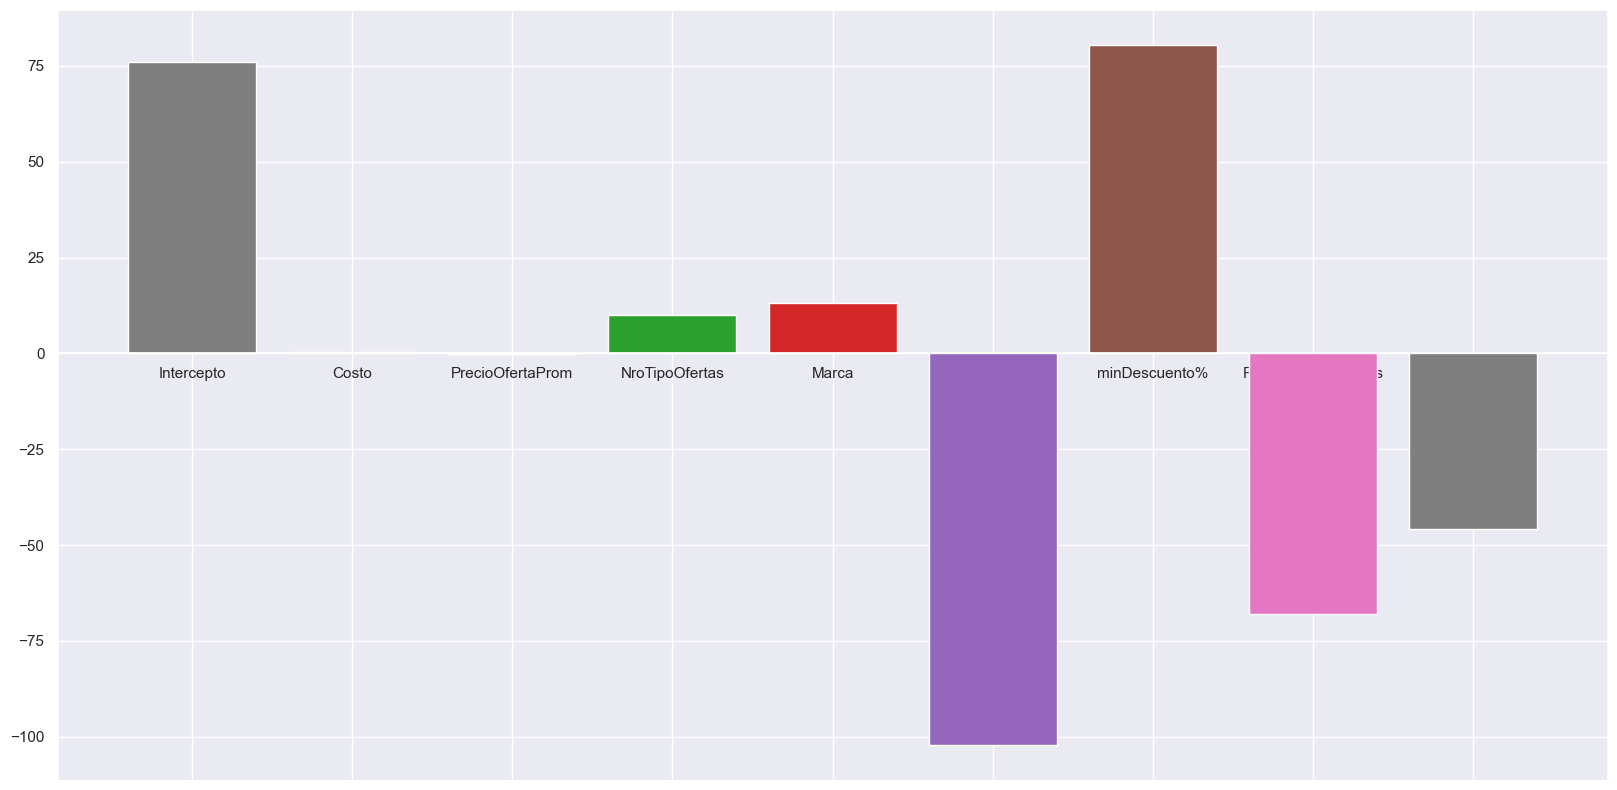

In [513]:
# Ajusta el tamaño de fuente en los gráficos creados por Seaborn.
sns.set(font_scale=1)
# Crea una figura y ejes para el gráfico, especificando el tamaño.
fig, ax = plt.subplots(figsize=(20, 10))
# Define una lista de colores para las barras del gráfico.
color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
# Crea un gráfico de barras utilizando los datos en rL_coefficient.Coeficientes 
#y rL_coefficient.Valores, con colores especificados.
ax.bar(rL_coefficient.Coeficientes, rL_coefficient.Valores, color=color)
# Ajusta la posición de la espina inferior (bottom) del gráfico a cero.
ax.spines['bottom'].set_position('zero')
# Aplica un estilo de gráfico usando el estilo 'ggplot'.
plt.style.use('ggplot')
# Muestra el gráfico.
plt.show()

## Performace del Modelo

## Definimos la función del MAPE

In [499]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [500]:
#predicciones
predictions = lm.predict(X_test)**2
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

MAE: 1951.2112086741477
MSE: 19916054.708538882
RMSE: 4462.740717153404
MAPE: 84.90725082872486


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

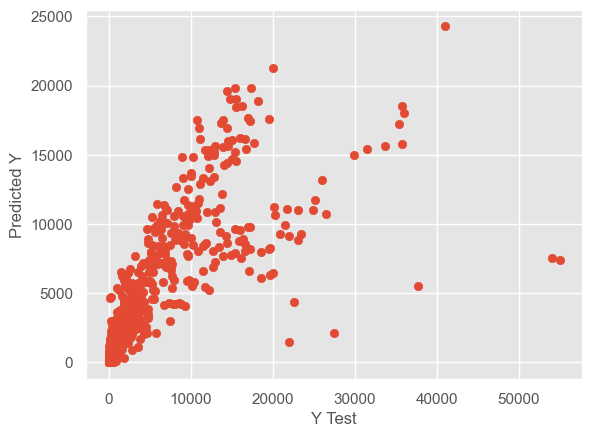

In [501]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


## Regresión Ridge

In [502]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, np.sqrt(y_train)) 



Ridge(alpha=1)

In [487]:
# Obtener el intercepto
model_ridge.intercept_.tolist()# pasarlo a lista


[72.15935459011922]

In [488]:
# Obtener los coeficientes
model_ridge.coef_[0].tolist() # pasarlo a lista

[0.43099267428692944,
 -0.18332823037463705,
 10.277411580172435,
 13.443234971823268,
 -96.3310950950078,
 30.48448565935493,
 6.98885910801014,
 -22.403041345692113]

In [504]:
##############
c1r=["Intercepto"]+X_train.columns.tolist()
c2r= model_ridge.intercept_.tolist()+ model_ridge.coef_[0].tolist() 

In [514]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Coeficientes"]= c1r 
ridge_coefficient['Valores'] = pd.DataFrame(c2r)
ridge_coefficient

,Coeficientes,Valores
0,Intercepto,72.159355
1,Costo,0.430993
2,PrecioOfertaProm,-0.183328
3,NroTipoOfertas,10.277412
4,Marca,13.443235
5,MaxDescuento%,-96.331095
6,minDescuento%,30.484486
7,FactordeDescuentos,6.988859
8,FlagCampana,-22.403041


## Gráfico de los Parámetros del Modelo Ridge

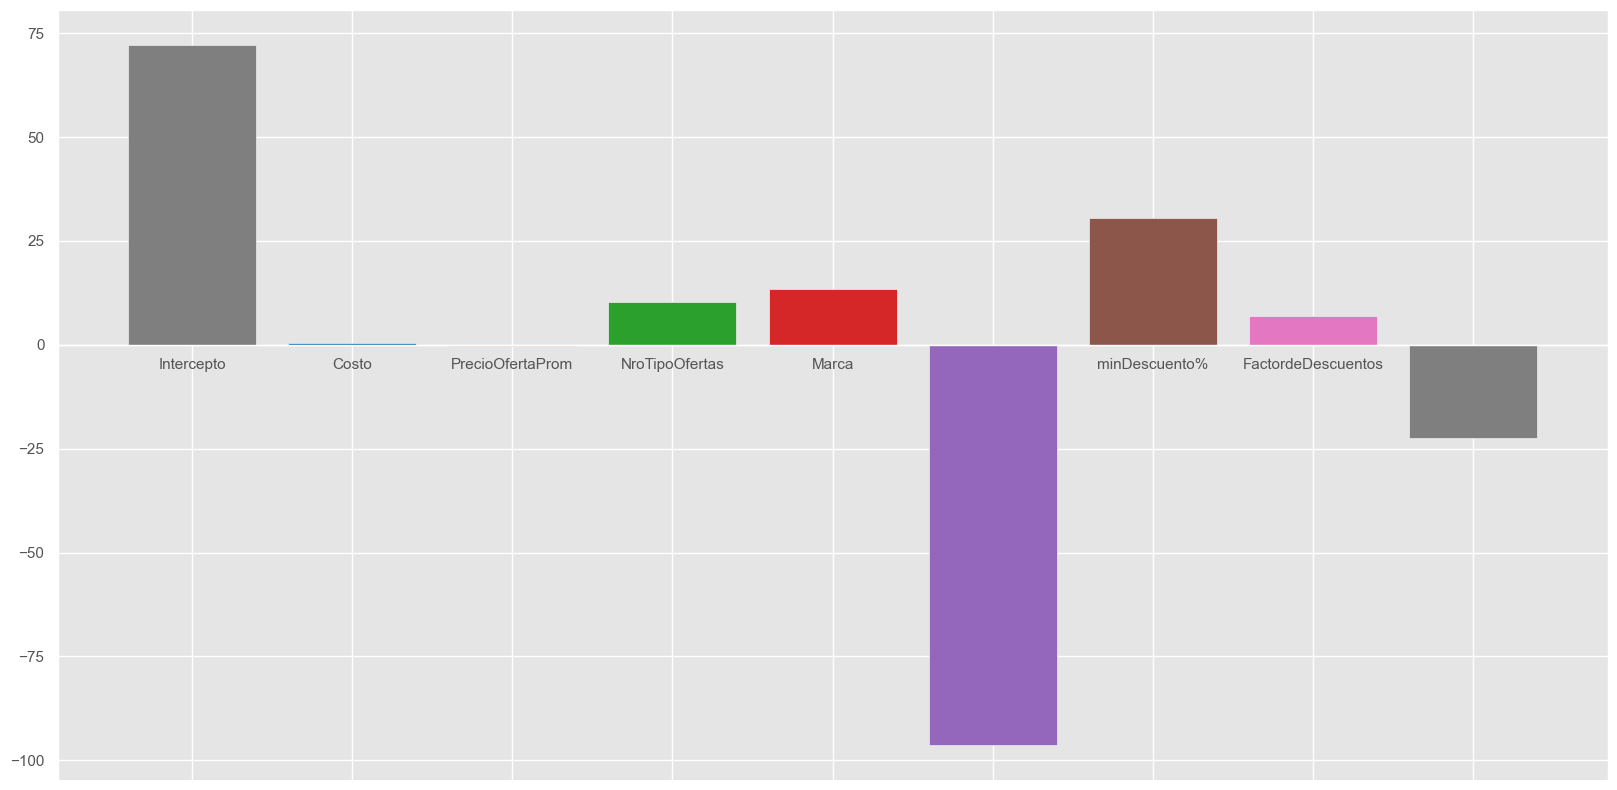

In [524]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(ridge_coefficient.Coeficientes,  
ridge_coefficient.Valores,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

## Performace del Modelo

In [518]:
pred_test_rr= model_ridge.predict(X_test)**2
print('MAE:', metrics.mean_absolute_error(y_test, pred_test_rr))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rr)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_rr))

MAE: 1948.935617361023
MSE: 19947449.37883342
RMSE: 4466.256752453157
MAPE: 84.88929372958002


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

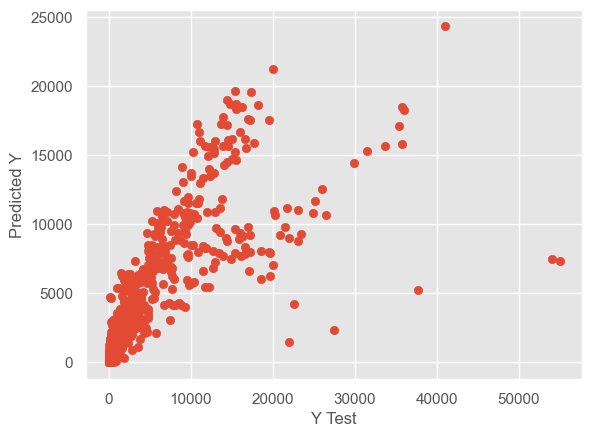

In [519]:
plt.scatter(y_test,pred_test_rr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regresión Lasso

In [525]:
model_lasso = Lasso(alpha= 0.01)
model_lasso.fit(X_train, np.sqrt(y_train)) 


Lasso(alpha=0.01)

In [526]:
ridge_lasso = pd.DataFrame() 
ridge_lasso["Columns"]= X_train.columns 
ridge_lasso['Coefficient_Estimate'] = pd.DataFrame(model_lasso.coef_)
ridge_lasso

,Columns,Coefficient_Estimate
0,Costo,0.429317
1,PrecioOfertaProm,-0.179403
2,NroTipoOfertas,10.535922
3,Marca,13.310075
4,MaxDescuento%,-101.188809
5,minDescuento%,35.094272
6,FactordeDescuentos,0.000000
7,FlagCampana,-24.043437


## Gráfico de los Parámetros del Modelo Lasso

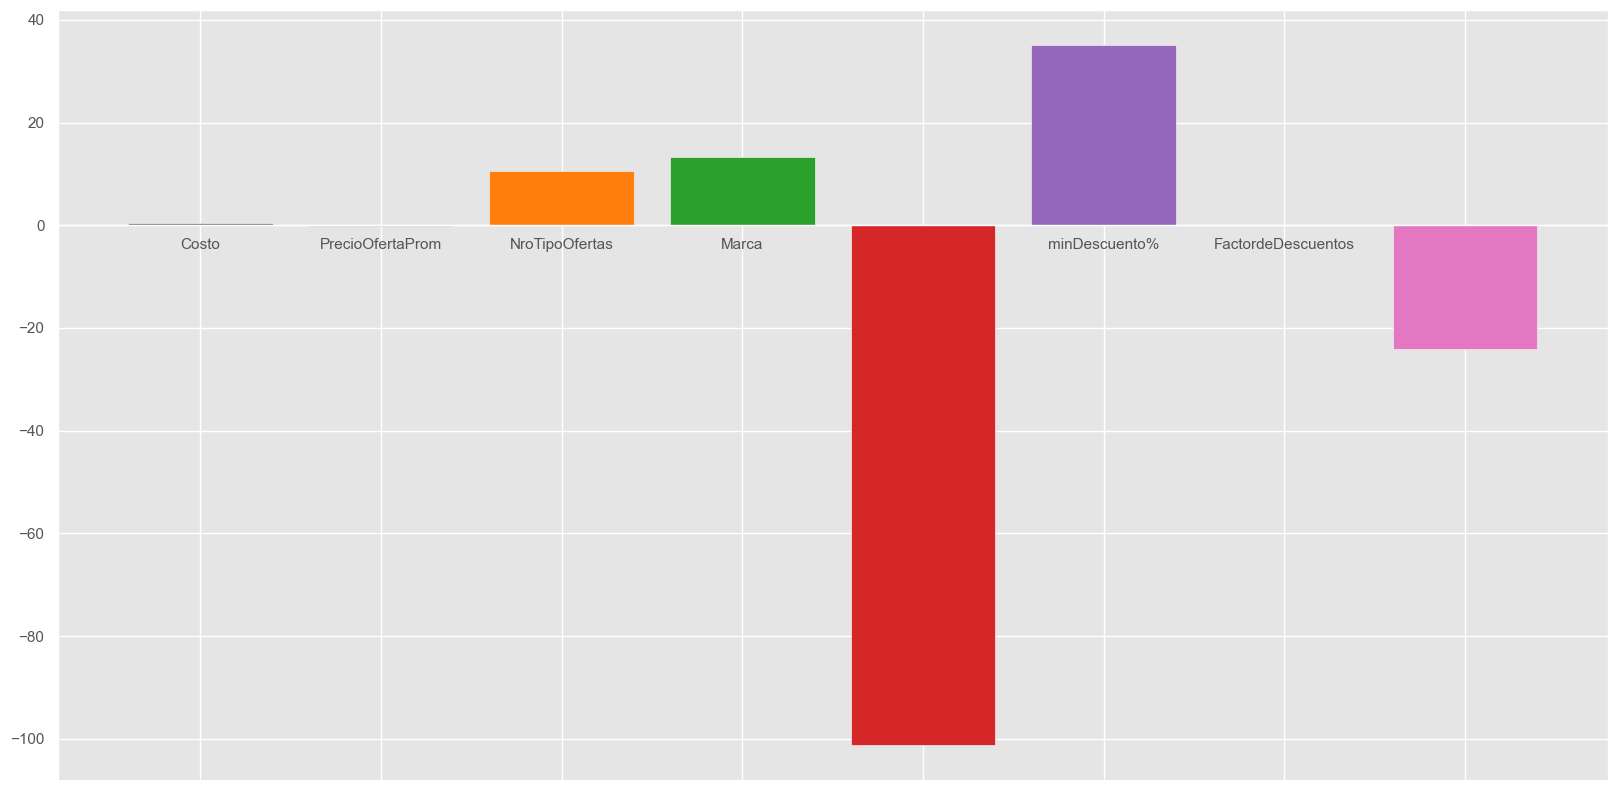

In [528]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_lasso.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

## Performace del Modelo

In [529]:
pred_test_lasso= model_lasso.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_lasso))

MAE: 1951.3631268537138
MSE: 19913906.547327813
RMSE: 4462.500033314041
MAPE: 1042.670777939748


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

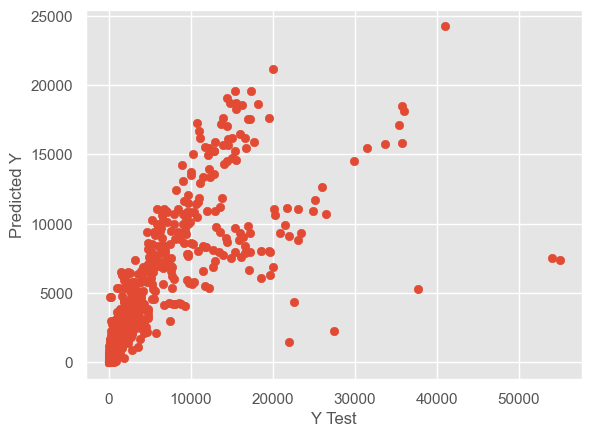

In [530]:
plt.scatter(y_test,pred_test_lasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regresión Elastic Net

In [531]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, np.sqrt(y_train)) 


ElasticNet(alpha=0.01)

In [532]:
ridge_elastic_net= pd.DataFrame() 
ridge_elastic_net["Columns"]= X_train.columns 
ridge_elastic_net['Coefficient_Estimate'] = pd.DataFrame(model_enet.coef_)
ridge_elastic_net

,Columns,Coefficient_Estimate
0,Costo,0.451630
1,PrecioOfertaProm,-0.219350
2,NroTipoOfertas,10.352057
3,Marca,14.781562
4,MaxDescuento%,-45.624460
5,minDescuento%,15.918996
6,FactordeDescuentos,8.487669
7,FlagCampana,-3.679162


## Gráfico de los Parámetros del Modelo Eslastic Net

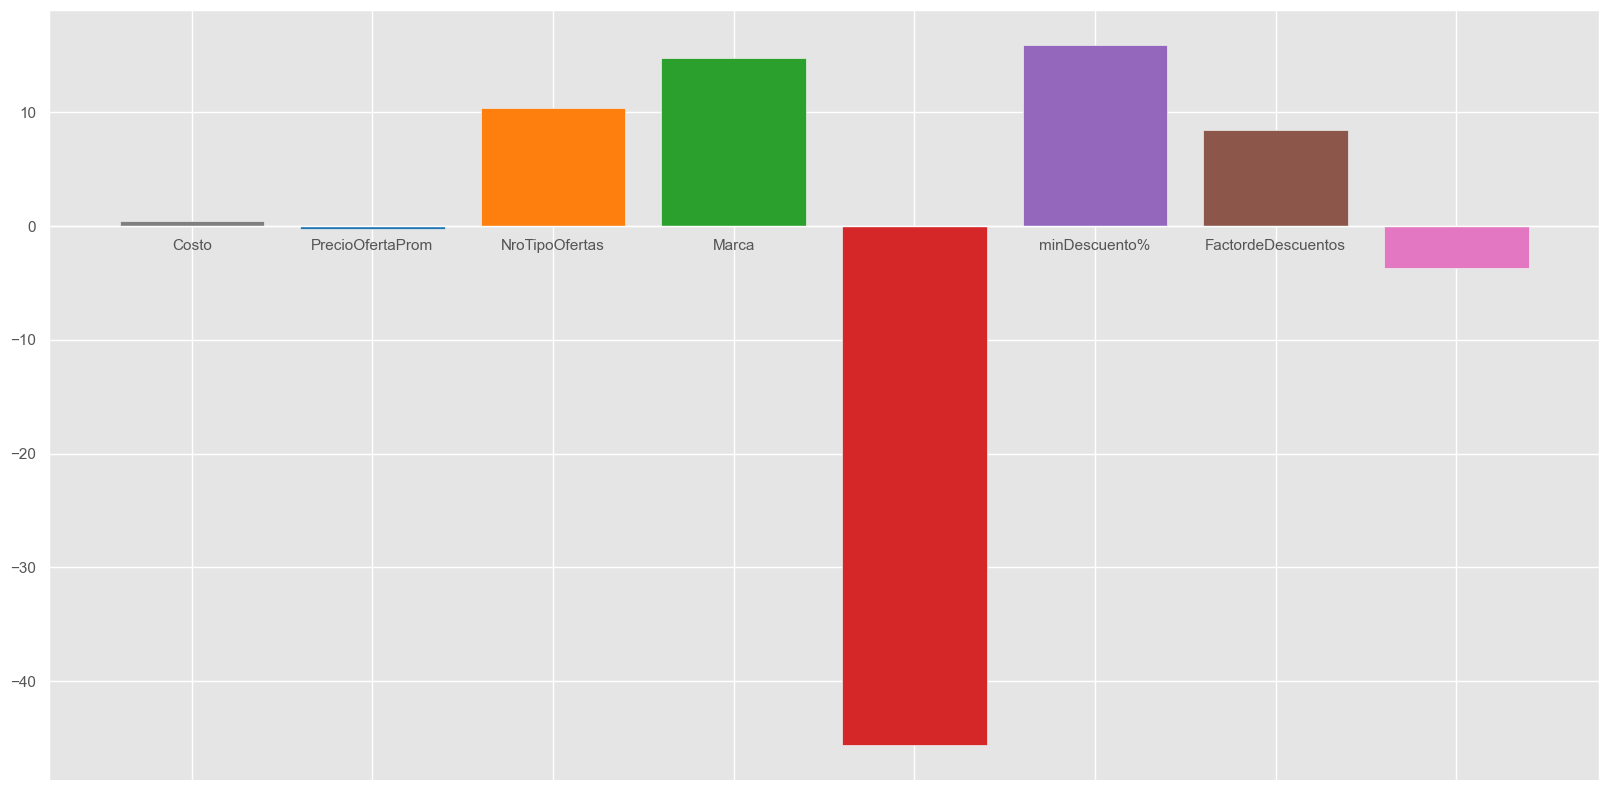

In [533]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_elastic_net.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

## Performace del Modelo

In [534]:
pred_test_enet= model_enet.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_enet))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_enet))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_enet))

MAE: 1944.3210659594736
MSE: 20490681.681675453
RMSE: 4526.663415991457
MAPE: 1032.0192105663348


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

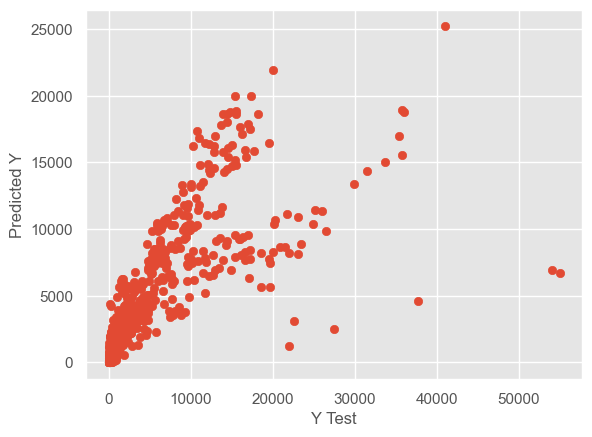

In [535]:
plt.scatter(y_test,pred_test_enet)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')